# Chapter: Dimension Reduction and Latent Variable Methods (Part 2)¶

# Topic: TEP data explore

In [1]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          exploration of Etch data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# fetch TEP data
TEdata_noFault_train = np.loadtxt('d00.dat').T # data arrnagement in d00.dat is different than that in other files
TEdata_Fault_train = np.loadtxt('d10.dat')

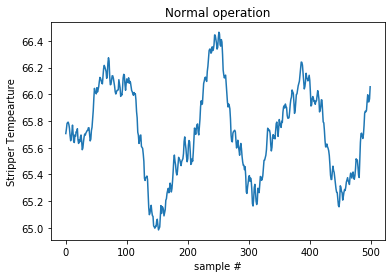

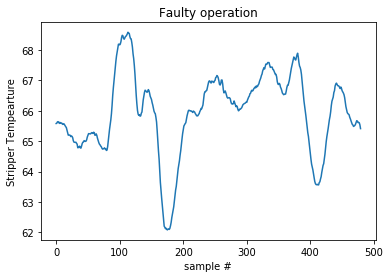

In [5]:
# quick visualize
plt.figure()
plt.plot(TEdata_noFault_train[:,17])
plt.xlabel('sample #')
plt.ylabel('Stripper Tempearture')
plt.title('Normal operation')
plt.show()

plt.figure()
plt.plot(TEdata_Fault_train[:,17])
plt.xlabel('sample #')
plt.ylabel('Stripper Tempearture')
plt.title('Faulty operation') 
plt.show()

In [5]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Visualize normal and faulty data in PC space
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [6]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
TEdata_noFault_scaled = scaler.fit_transform(TEdata_noFault_train)
TEdata_Fault_scaled = scaler.transform(TEdata_Fault_train)

In [7]:
#%% build PCA model and copmute PC scores
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(TEdata_noFault_scaled)
TEdata_noFault_scores = pca.transform(TEdata_noFault_scaled)
TEdata_Fault_scores = pca.transform(TEdata_Fault_scaled)

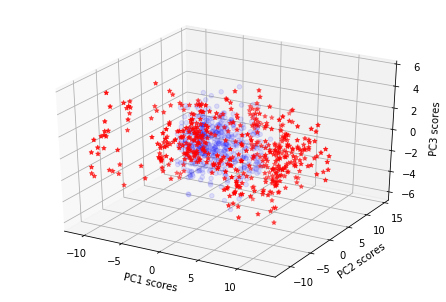

In [9]:
#%% visualize in 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(TEdata_noFault_scores[:,0],TEdata_noFault_scores[:,1],TEdata_noFault_scores[:,2], c='blue', alpha=0.1, label='Normal operation')
ax.scatter(TEdata_Fault_scores[:,0],TEdata_Fault_scores[:,1],TEdata_Fault_scores[:,2], c='red', marker = '*', label='Faulty operation')
ax.set_xlabel('PC1 scores')
ax.set_ylabel('PC2 scores')
ax.set_zlabel('PC3 scores')
plt.show()